# wine quality prediction
   The dataset of white and red wine is given

# Importing lib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
import time
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings

In [2]:
warnings.filterwarnings(action="ignore")
pd.set_option('display.width', 1000)
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)

# Importing and setting up data

In [14]:
redWineData = pd.DataFrame(pd.read_csv('RedWineData.csv', delimiter=';'))
whiteWineData = pd.DataFrame(pd.read_csv('whiteWineData.csv', delimiter=';'))
print("\n\nSample and shape of the redwine dataset\n")
redWineData.head(5)




Sample and shape of the redwine dataset



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
print("\n\nSample and shape of the whitewine dataset\n")
whiteWineData.head(5)



Sample and shape of the whitewine dataset



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
print("\n\n shape of the whitewine and redwine dataset\n")
print('\n\nshape of the redWineData: \n ', redWineData.shape)
print('\n\nshape of the whiteWineData: \n ', whiteWineData.shape)



 shape of the whitewine and redwine dataset



shape of the redWineData: 
  (1599, 12)


shape of the whiteWineData: 
  (4898, 12)


# Combining the two dataset of red and white wine
  Since the features of both the datset is similar, combining will make the program efficient

In [16]:
# To diffrentiate between two dataset, create a new column called WineType
redWineData['WineType'] = 'Red'
whiteWineData['WineType'] = 'White'

redWineData.head(5)  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [17]:
whiteWineData.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [34]:
# combining the dataset
data = redWineData.append(whiteWineData, ignore_index=True)
data.shape

(6497, 13)

In [9]:
data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineType
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


In [18]:
# To check the nan in the data set
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

checking the target variable

In [22]:
# To check the count of winetype and quality
data["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [39]:
data["WineType"].value_counts()

White    4898
Red      1599
Name: WineType, dtype: int64

# Now to visualize , understand and modify the data

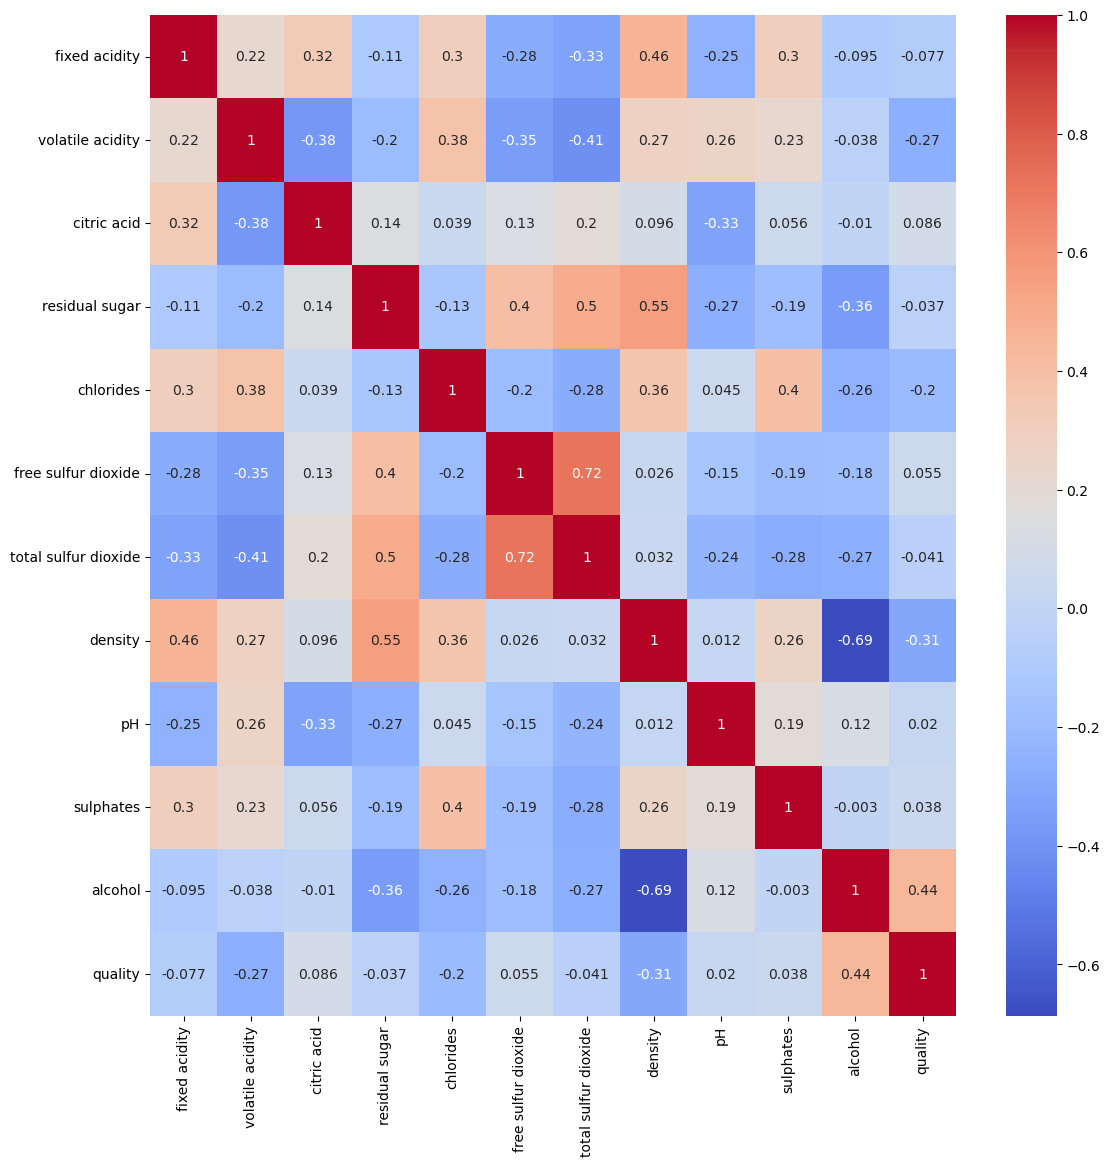

In [25]:
# Correlation matrix for the dataset
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), annot=True, cmap= 'coolwarm')
plt.show()

# To check for outliers in the data

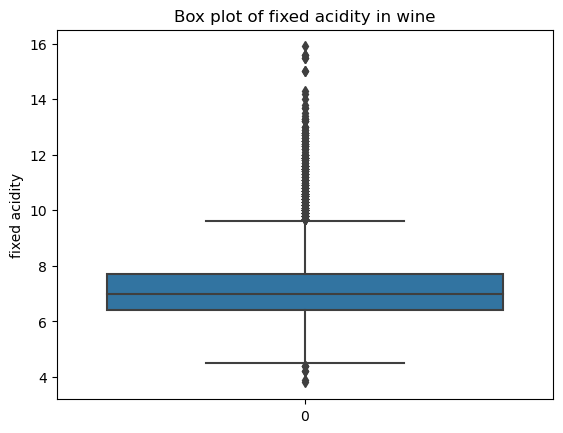

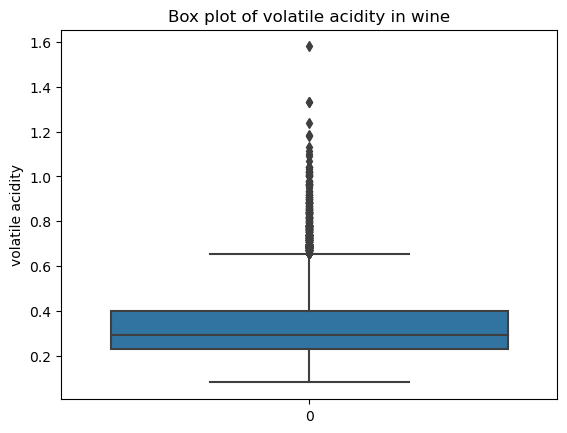

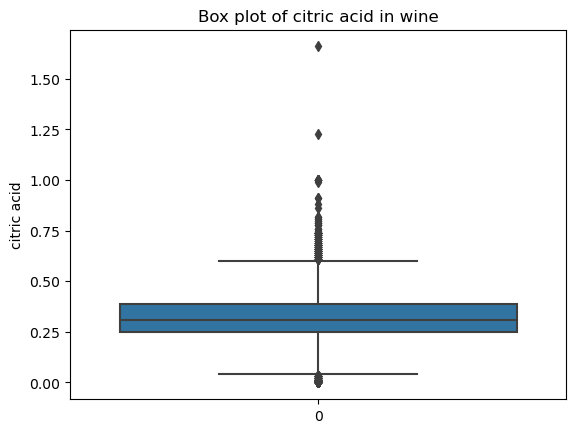

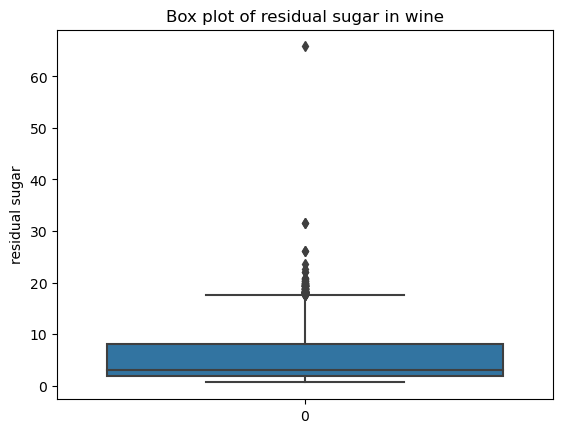

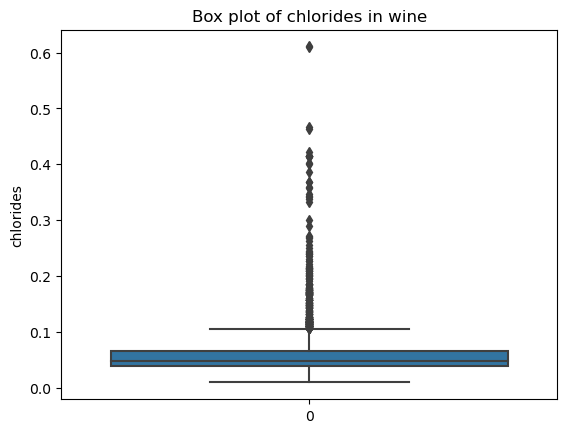

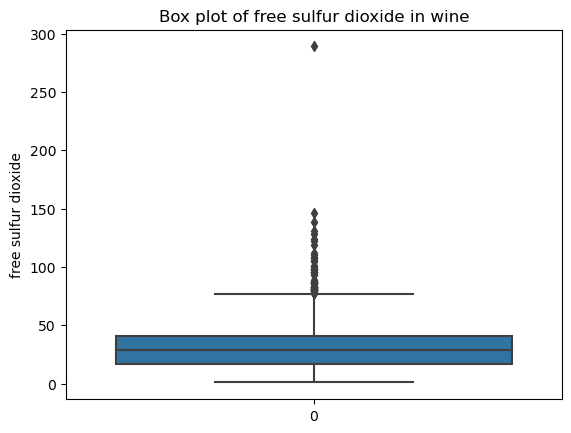

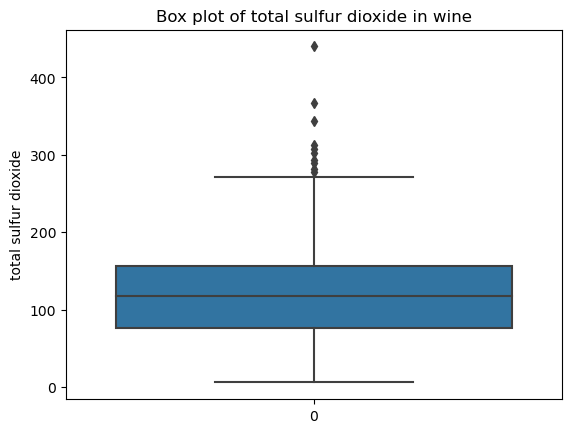

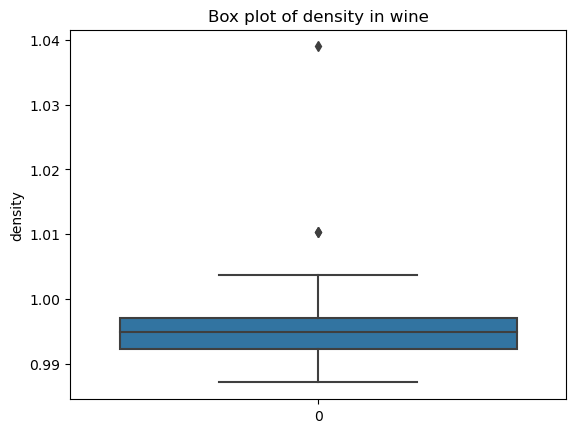

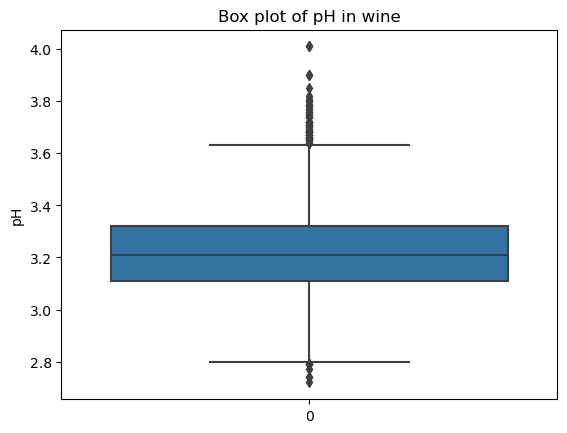

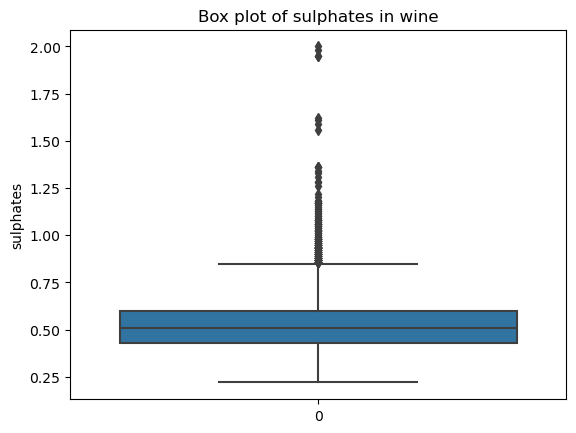

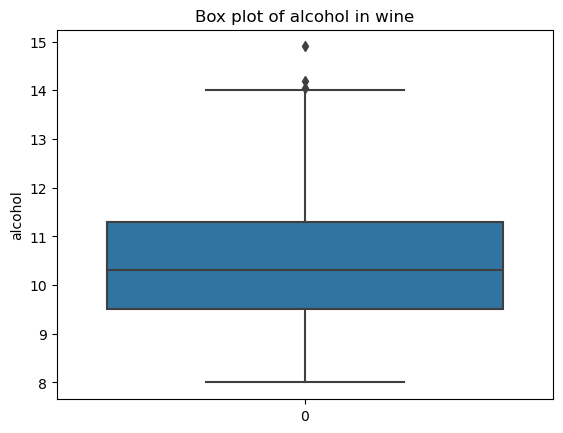

In [26]:
columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide",
           "total sulfur dioxide","density","pH", "sulphates", "alcohol"]

for hnames in columns:
    sns.boxplot(data=data[hnames])
    plt.ylabel(hnames)
    plt.title(f'Box plot of {hnames} in wine')
    plt.show()

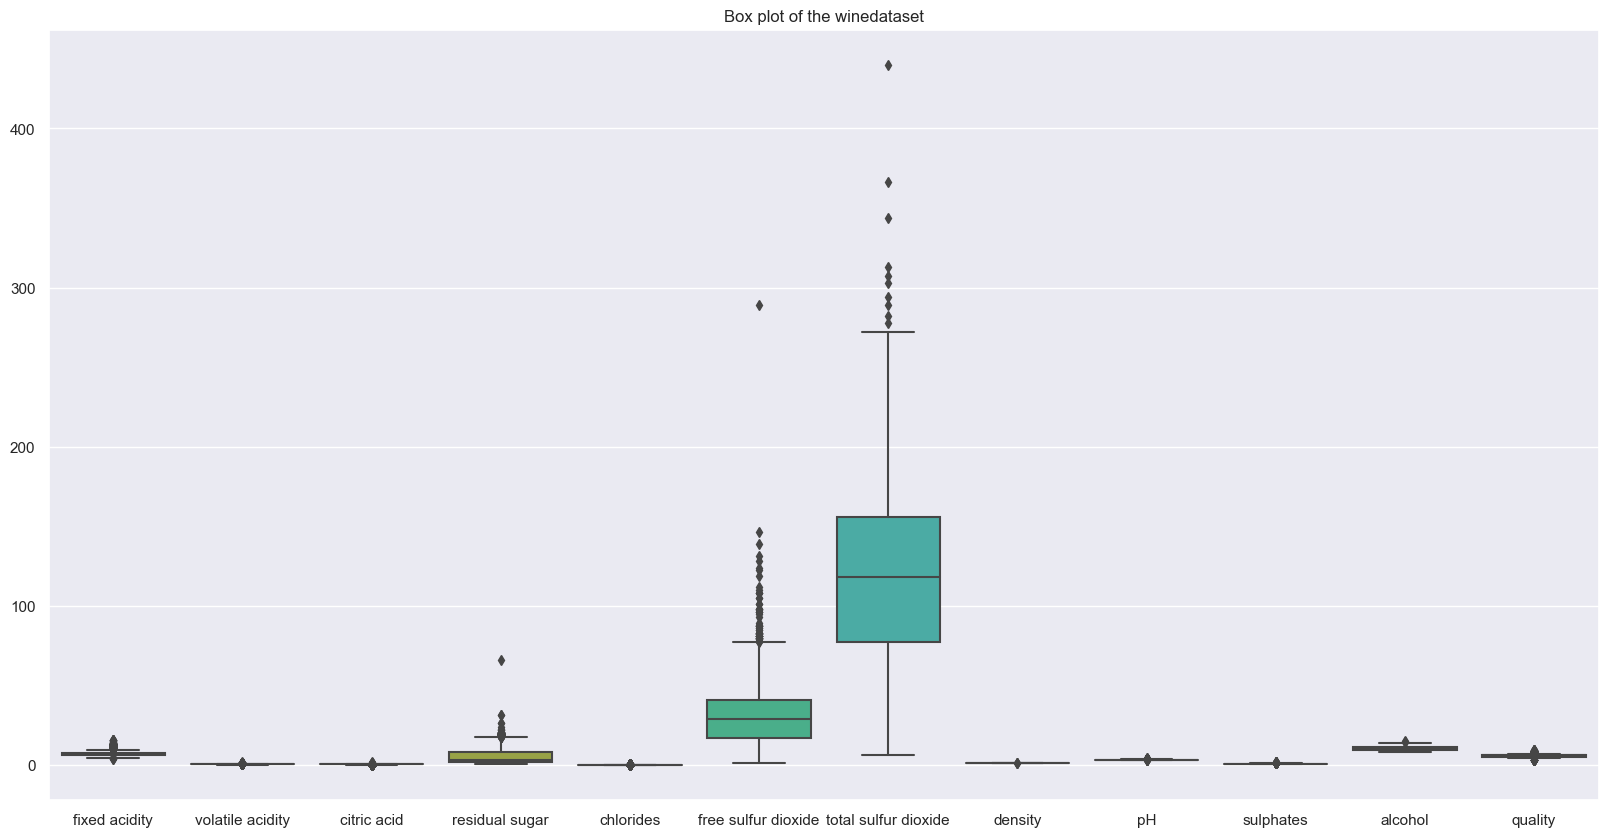

In [27]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.title('Box plot of the winedataset')
plt.show()

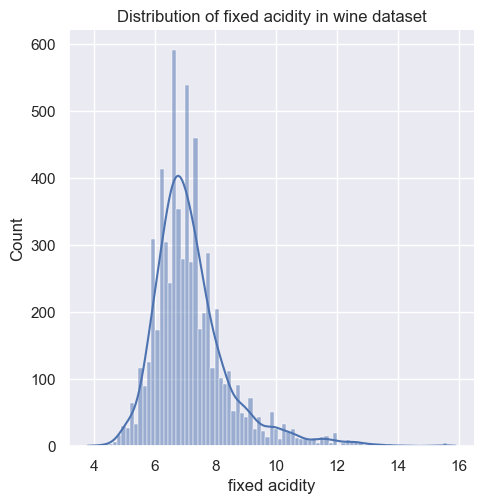

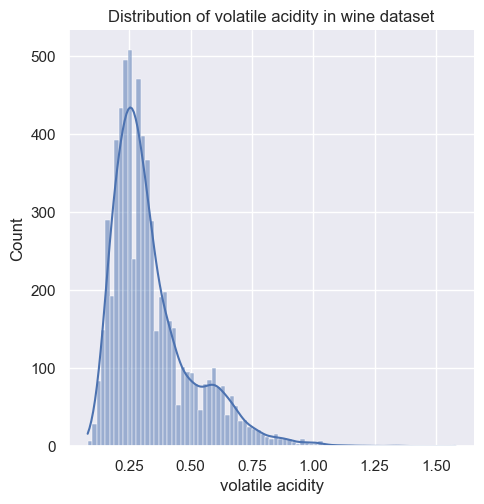

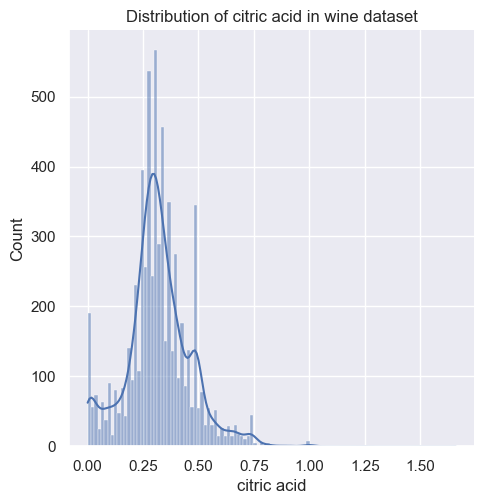

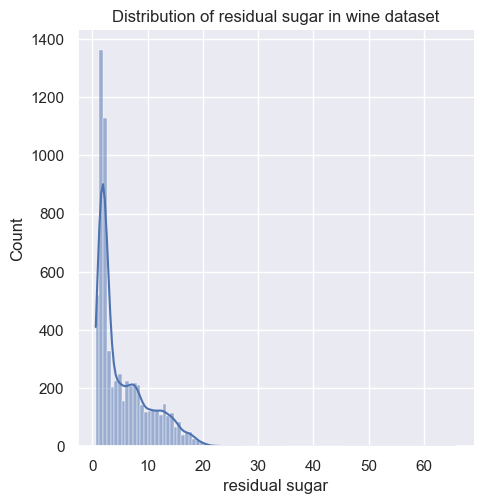

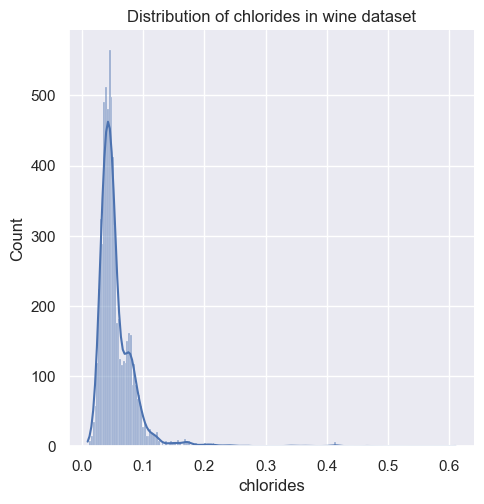

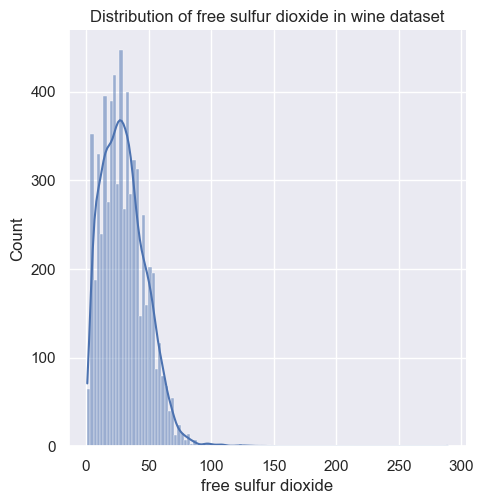

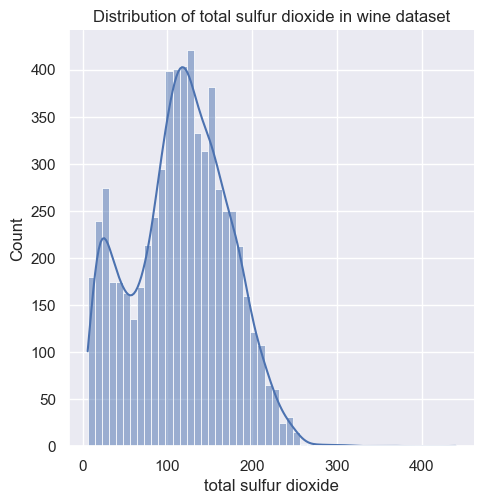

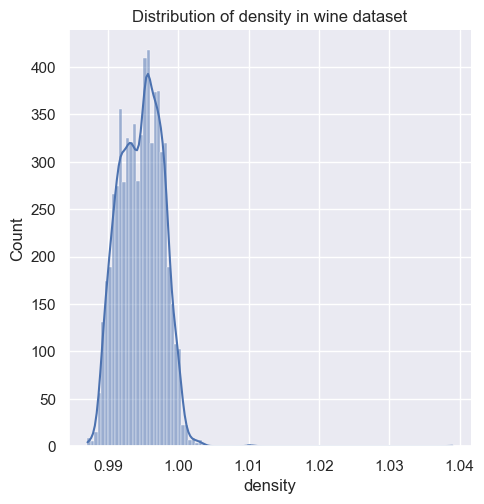

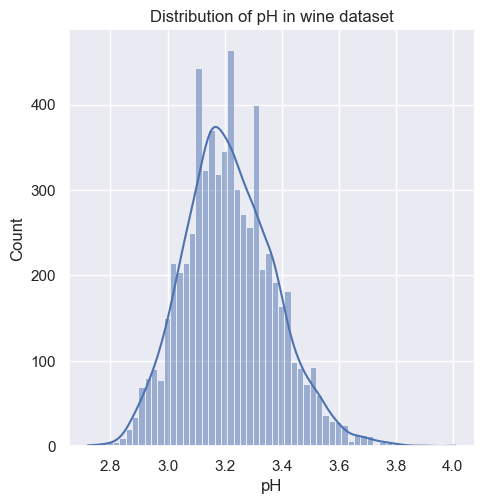

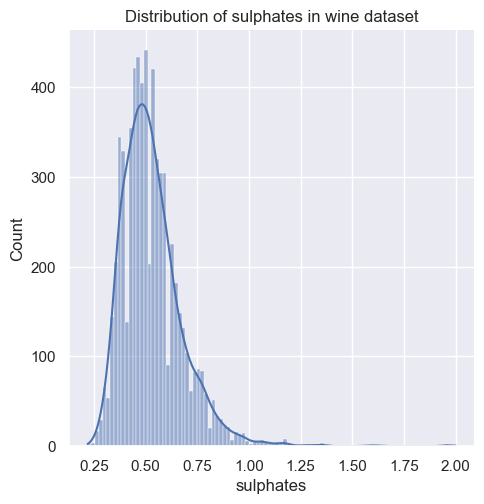

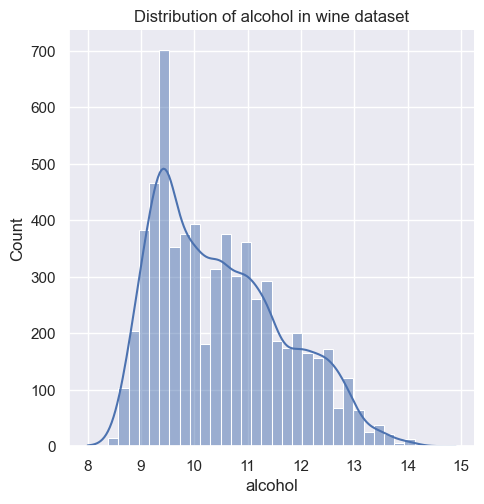

In [28]:
# Plotting displot understand the distribution on the features in the data set
for column in columns:
    sns.displot(data[column], kde=True)
    plt.title(f'Distribution of {column} in wine dataset')
    plt.xlabel(column)
    plt.show()

## Creating a function to remove outliers 

In [29]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return df_no_outliers

### Removing the outliers from the some features which might afftect the model  

In [42]:
data = remove_outliers(data, 'fixed acidity')
data = remove_outliers(data, 'residual sugar')
data = remove_outliers(data, 'free sulfur dioxide')
data = remove_outliers(data, 'total sulfur dioxide')
data = remove_outliers(data, 'chlorides')

# visualisation of sample and shape of the data after removing outliers `

In [47]:
 data.head(5) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Red


In [44]:
data.shape

(5653, 13)

In [45]:
data["quality"].value_counts()

6    2503
5    1776
7     989
4     187
8     178
3      15
9       5
Name: quality, dtype: int64

In [46]:
data["WineType"].value_counts()

White    4604
Red      1049
Name: WineType, dtype: int64

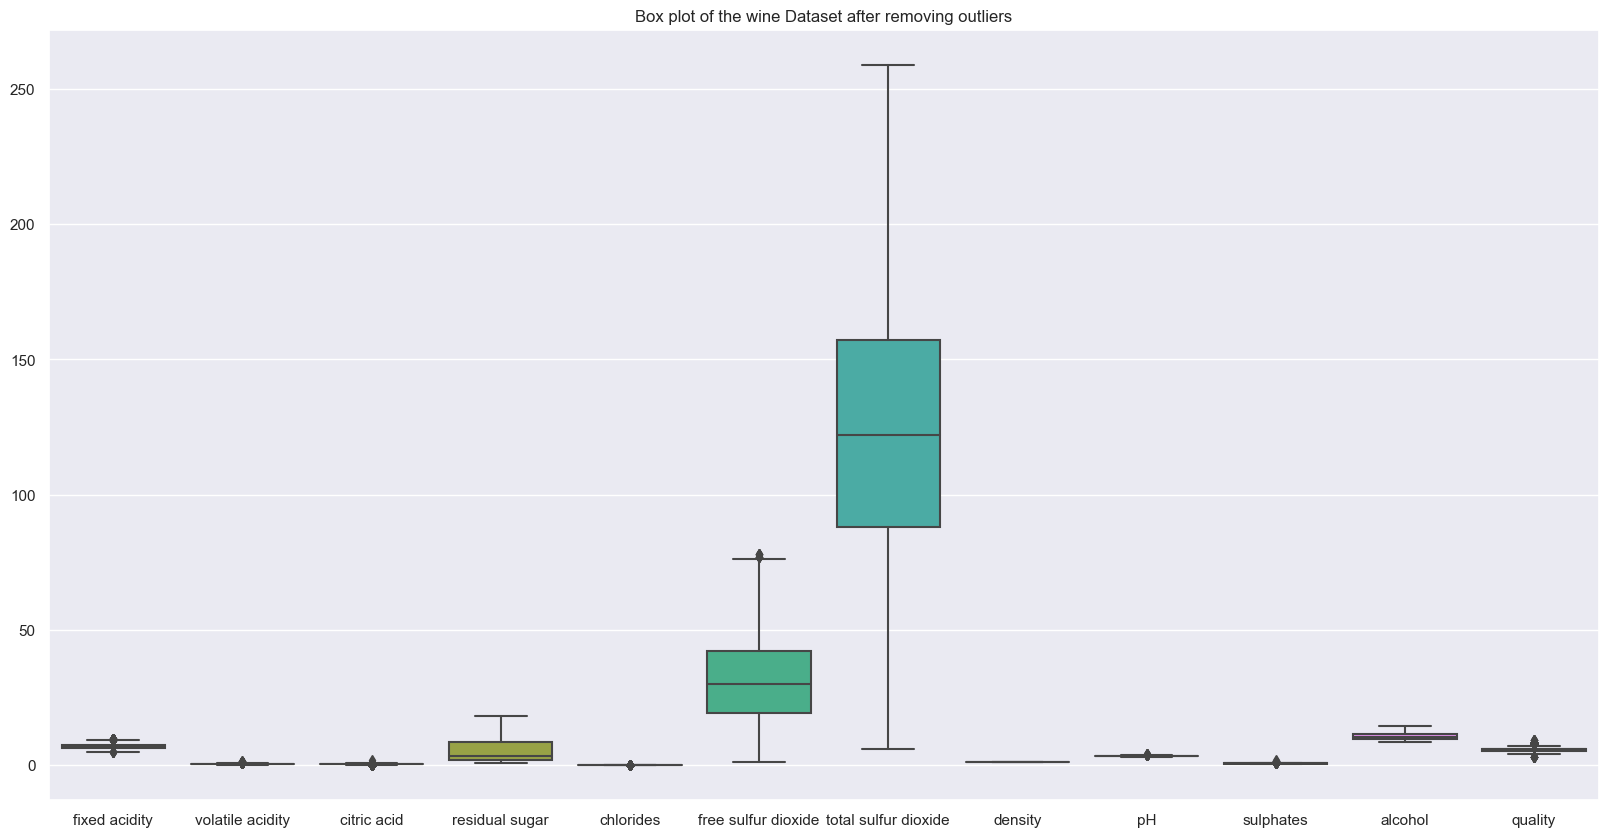

In [43]:
sns.set()
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.title('Box plot of the wine Dataset after removing outliers')
plt.show()

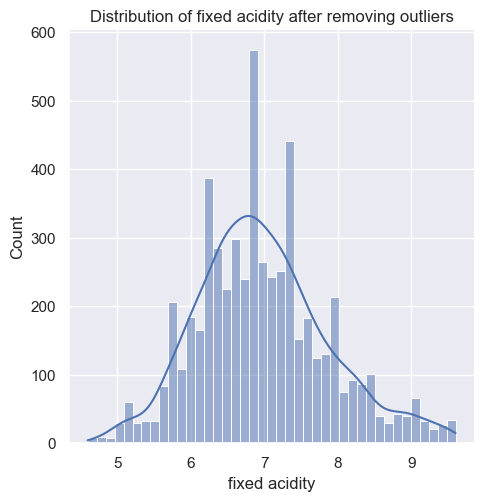

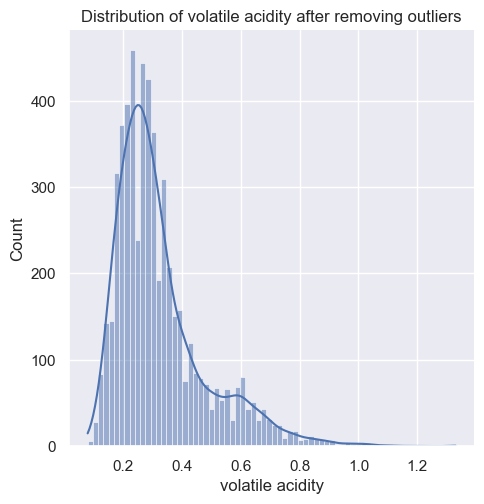

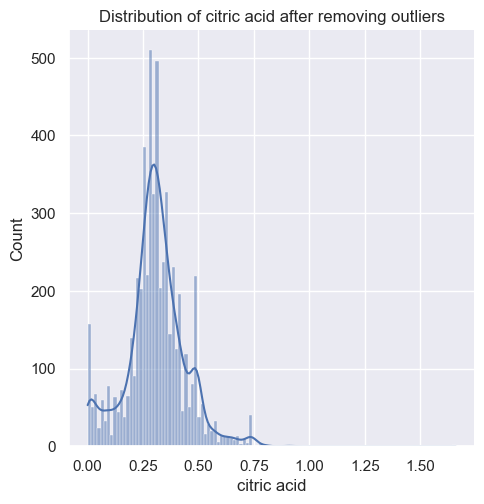

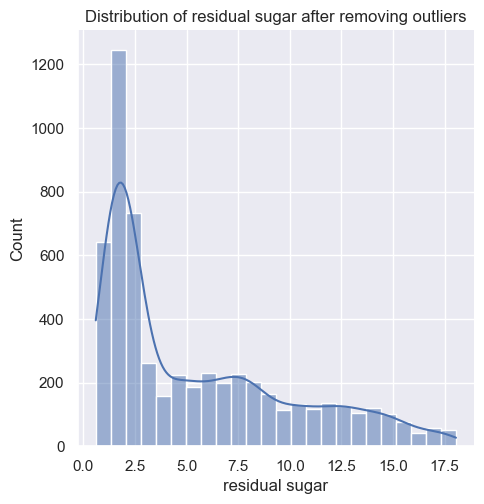

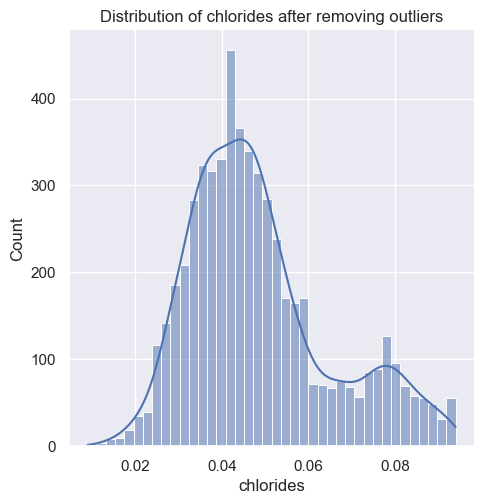

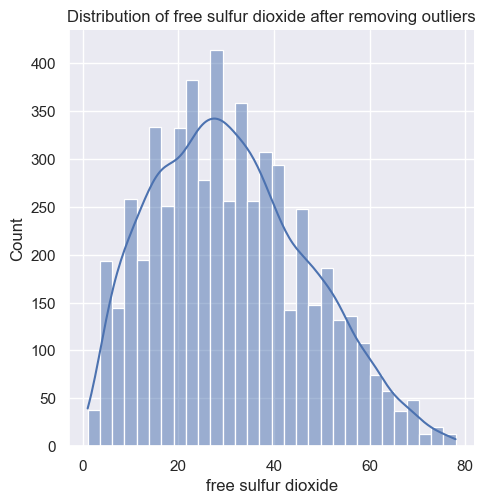

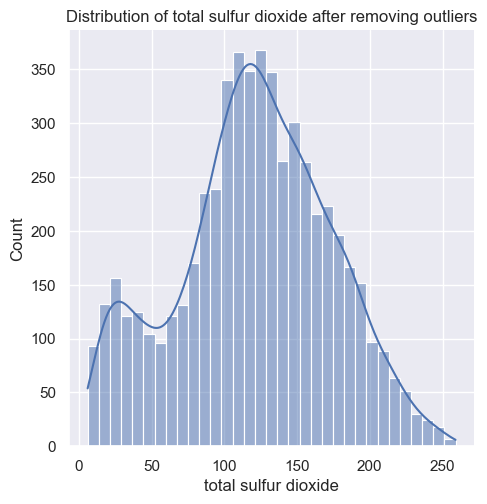

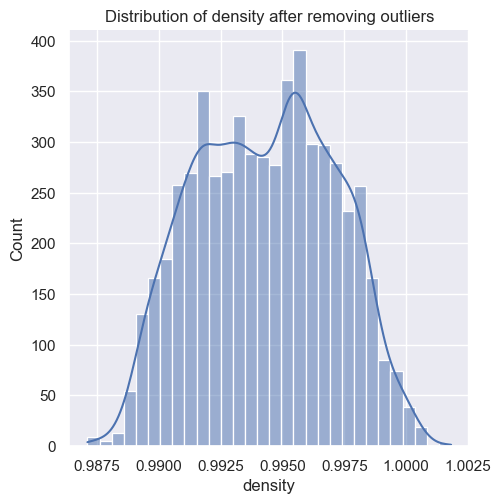

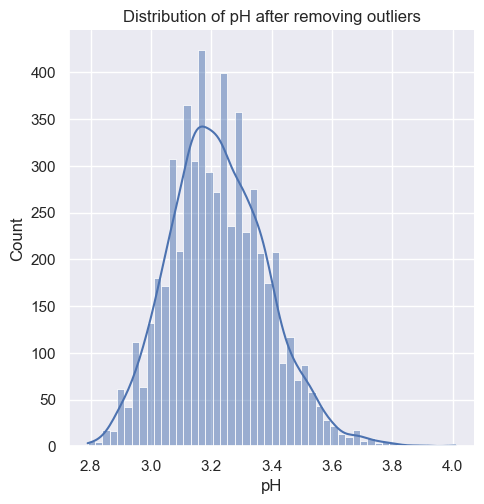

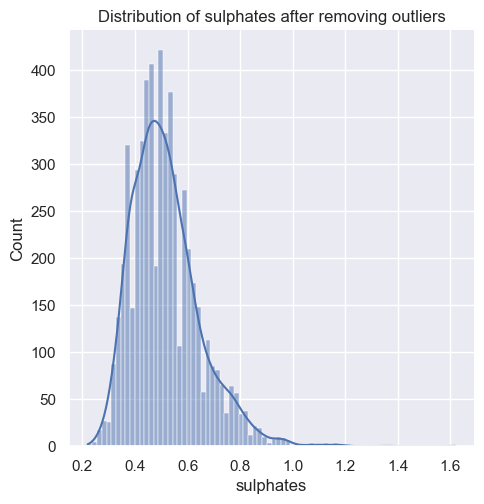

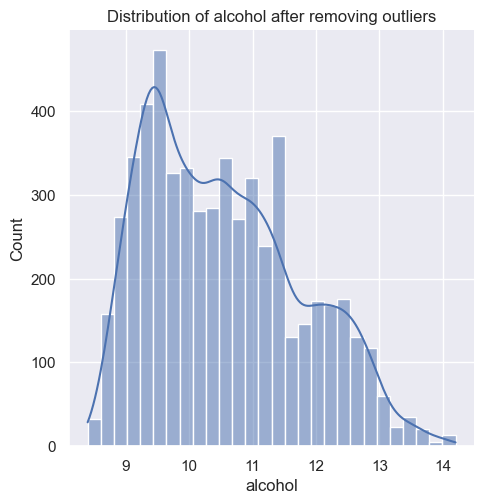

In [48]:
for column in columns:
    sns.displot(data[column], kde=True)
    plt.title(f'Distribution of {column} after removing outliers')
    plt.xlabel(column)
    plt.show()

## Let use see the relationship between features and the target variable-quality

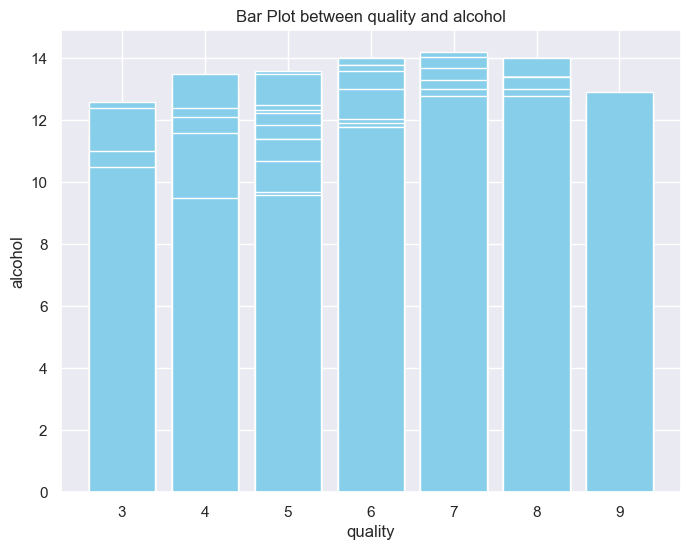

In [49]:
plt.figure(figsize=(8, 6))
plt.bar(data['quality'], data['alcohol'], color='skyblue')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.title('Bar Plot between quality and alcohol')
plt.show()

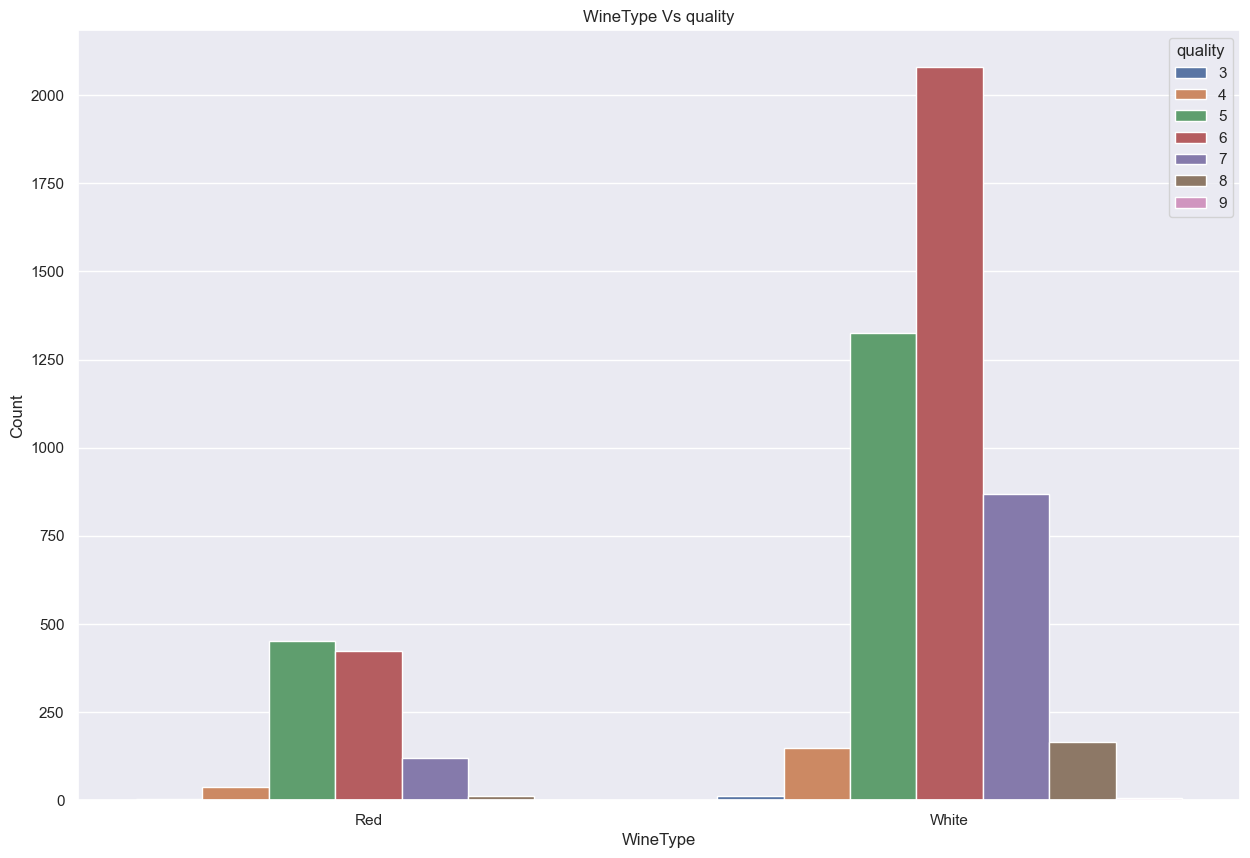

In [50]:
# count of quality of the  wine type
plt.figure(figsize=(15,10))
ax=sns.countplot(data=data, x='WineType', hue=data.quality)
plt.xlabel("WineType")
plt.ylabel("Count")
plt.title("WineType Vs quality")
plt.show()

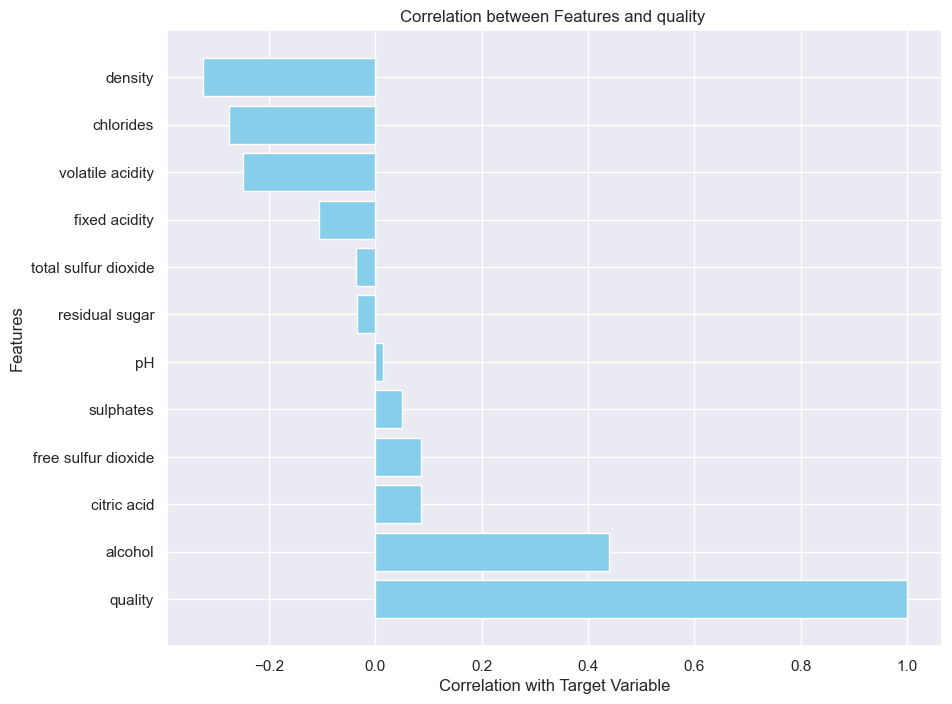

In [51]:
# seeing the correlation between different features and quality
correlation_matrix = data.corr()
target_correlations = correlation_matrix['quality']
sorted_features = target_correlations.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(sorted_features.index, sorted_features.values, color='skyblue')
plt.xlabel('Correlation with Target Variable')
plt.ylabel('Features')
plt.title('Correlation between Features and quality ')
plt.show()

# Model training and selection

## Preparing the dataset for modeling

In [52]:
data = pd.get_dummies(data)

input_predictors = data.drop(['quality'], axis=1)
ouptut_target = data["quality"]

In [53]:
ouptut_target.value_counts()

6    2503
5    1776
7     989
4     187
8     178
3      15
9       5
Name: quality, dtype: int64

# Training Model on imbalanced data:

In [54]:
x_train, x_val, y_train, y_val  = train_test_split(input_predictors, ouptut_target,
                                                    test_size = 0.25, random_state = 6)

In [55]:
# scaling the data for bettr accuracy and performance
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

### Training model on linear reggression

In [56]:
# MODEL-0 )Linear Regression model
LinearRegression1 = LinearRegression()
start_time = time.time()
LinearRegression1.fit(x_train_scaled, y_train)
end_time = time.time()
predictions = LinearRegression1.predict(x_val_scaled)

# Calculate and print metrics
mse = mean_squared_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

print("\n\nMean Squared Error of linearRegression:", mse*100)
print("R-squared of LinearRegression:", r2*100)

print("Training Time: {:.2f} seconds".format(end_time - start_time))



Mean Squared Error of linearRegression: 53.254721247323666
R-squared of LinearRegression: 29.43631998941386
Training Time: 0.02 seconds


#### From the above model we can see that the linear reggresstion performs normally in a unbalanced dataset

## Let us train some bit advance model than linear reggression

In [57]:
# MODEL-1) LogisticRegression
LogisticRegression1 = LogisticRegression()
start_time = time.time()
LogisticRegression1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = LogisticRegression1.predict(x_val_scaled)
acc_LogisticRegression = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-1: Accuracy of LogisticRegression: ", acc_LogisticRegression)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

#MODEL-2) Gaussian Naive Bayes

GaussianNB1 = GaussianNB()
start_time = time.time()
GaussianNB1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = GaussianNB1.predict(x_val_scaled)
acc_GaussianNB = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-2: Accuracy of GaussianNB: ", acc_GaussianNB)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

RandomForestClassifier1 = RandomForestClassifier()
start_time = time.time()
RandomForestClassifier1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = RandomForestClassifier1.predict(x_val_scaled)
acc_RandomForestClassifier = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-3: Accuracy of RandomForestClassifier: ", acc_RandomForestClassifier)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

KNeighborsClassifier1 = KNeighborsClassifier()
start_time = time.time()
KNeighborsClassifier1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = KNeighborsClassifier1.predict(x_val_scaled)
acc_KNeighborsClassifier = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-4: Accuracy of KNeighborsClassifier: ", acc_KNeighborsClassifier)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

LinearDiscriminantAnalysis1 = LinearDiscriminantAnalysis()
start_time = time.time()
LinearDiscriminantAnalysis1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = LinearDiscriminantAnalysis1.predict(x_val_scaled)
acc_LinearDiscriminantAnalysis = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-5: Accuracy of LinearDiscriminantAnalysis: ", acc_LinearDiscriminantAnalysis)
print("Training Time: {:.2f} seconds".format(end_time - start_time))


#MODEL-6) decisiontree
decisiontree1 = DecisionTreeClassifier()
start_time = time.time()
decisiontree1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = decisiontree1.predict(x_val_scaled)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-6: Accuracy of DecisionTreeClassifier: ", acc_decisiontree)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

#MODEL-7) SVC
SVC1 = SVC()
start_time = time.time()
SVC1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = SVC1.predict(x_val_scaled)
acc_SVC = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-7: Accuracy of SVC: ", acc_SVC)
print("Training Time: {:.2f} seconds".format(end_time - start_time))



MODEL-1: Accuracy of LogisticRegression:  53.39
Training Time: 0.10 seconds


MODEL-2: Accuracy of GaussianNB:  38.76
Training Time: 0.00 seconds


MODEL-3: Accuracy of RandomForestClassifier:  70.01
Training Time: 0.80 seconds


MODEL-4: Accuracy of KNeighborsClassifier:  55.94
Training Time: 0.01 seconds


MODEL-5: Accuracy of LinearDiscriminantAnalysis:  53.96
Training Time: 0.01 seconds


MODEL-6: Accuracy of DecisionTreeClassifier:  61.32
Training Time: 0.03 seconds


MODEL-7: Accuracy of SVC:  55.94
Training Time: 0.88 seconds


  we can observe that the in this unbalanced data the highest performing model is RandomForestClassiffier
But these models are not good

# balancing and training the model 

Let us Balance the dataset for better accuracy 

In [58]:
# Using SMOTE for balancing the data
smote = SMOTE(k_neighbors=4)
input_predictors, ouptut_target = smote.fit_resample(input_predictors, ouptut_target)

In [67]:
x_train, x_val, y_train, y_val  = train_test_split(input_predictors, ouptut_target,
                                                    test_size = 0.25, random_state = 6)

In [68]:
# again scaling for better performance
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Training model with imbalanced data

In [69]:
# MODEL-0 )Linear Regression model
LinearRegression1 = LinearRegression()
start_time = time.time()
LinearRegression1.fit(x_train_scaled, y_train)
end_time = time.time()
predictions = LinearRegression1.predict(x_val_scaled)

# Calculate and print metrics
mse = mean_squared_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

print("\n\nMean Squared Error of linearRegression:", mse*100)
print("R-squared of LinearRegression:", r2*100)

print("Training Time: {:.2f} seconds".format(end_time - start_time))



Mean Squared Error of linearRegression: 178.83321253925533
R-squared of LinearRegression: 54.45932480191906
Training Time: 0.01 seconds


#### This output show that MSE very high which means that model performs pretty worst in the balance data set

## lets train the other model in this balanced dataset

In [70]:
# MODEL-1) LogisticRegression
LogisticRegression1 = LogisticRegression()
start_time = time.time()
LogisticRegression1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = LogisticRegression1.predict(x_val_scaled)
acc_LogisticRegression = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-1: Accuracy of LogisticRegression: ", acc_LogisticRegression)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

#MODEL-2) Gaussian Naive Bayes

GaussianNB1 = GaussianNB()
start_time = time.time()
GaussianNB1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = GaussianNB1.predict(x_val_scaled)
acc_GaussianNB = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-2: Accuracy of GaussianNB: ", acc_GaussianNB)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

# MODEL-3) RandomForestClassifier
RandomForestClassifier1 = RandomForestClassifier()
start_time = time.time()
RandomForestClassifier1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = RandomForestClassifier1.predict(x_val_scaled)
acc_RandomForestClassifier = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-3: Accuracy of RandomForestClassifier: ", acc_RandomForestClassifier)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

# MODEL-4) KNeighborsClassifier
KNeighborsClassifier1 = KNeighborsClassifier()
start_time = time.time()
KNeighborsClassifier1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = KNeighborsClassifier1.predict(x_val_scaled)
acc_KNeighborsClassifier = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-4: Accuracy of KNeighborsClassifier: ", acc_KNeighborsClassifier)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

# MODEL-5) LinearDiscriminantAnalysis
LinearDiscriminantAnalysis1 = LinearDiscriminantAnalysis()
start_time = time.time()
LinearDiscriminantAnalysis1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = LinearDiscriminantAnalysis1.predict(x_val_scaled)
acc_LinearDiscriminantAnalysis = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-5: Accuracy of LinearDiscriminantAnalysis: ", acc_LinearDiscriminantAnalysis)
print("Training Time: {:.2f} seconds".format(end_time - start_time))


#MODEL-6) decisiontree
decisiontree1 = DecisionTreeClassifier()
start_time = time.time()
decisiontree1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = decisiontree1.predict(x_val_scaled)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-6: Accuracy of DecisionTreeClassifier: ", acc_decisiontree)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

#MODEL-7) SVC
SVC1 = SVC()
start_time = time.time()
SVC1.fit(x_train_scaled, y_train)
end_time = time.time()
y_pred = SVC1.predict(x_val_scaled)
acc_SVC = round(accuracy_score(y_pred, y_val) * 100, 2)

# Print accuracy and training time
print("\n\nMODEL-7: Accuracy of SVC: ", acc_SVC)
print("Training Time: {:.2f} seconds".format(end_time - start_time))



MODEL-1: Accuracy of LogisticRegression:  51.02
Training Time: 0.26 seconds


MODEL-2: Accuracy of GaussianNB:  30.2
Training Time: 0.00 seconds


MODEL-3: Accuracy of RandomForestClassifier:  88.2
Training Time: 3.27 seconds


MODEL-4: Accuracy of KNeighborsClassifier:  81.05
Training Time: 0.04 seconds


MODEL-5: Accuracy of LinearDiscriminantAnalysis:  50.03
Training Time: 0.02 seconds


MODEL-6: Accuracy of DecisionTreeClassifier:  81.83
Training Time: 0.16 seconds


MODEL-7: Accuracy of SVC:  67.27
Training Time: 5.06 seconds


### From the above output we can observe that RandomForestClassifier has the highest accuracy
 So let us save the Ranodm forest model

In [72]:
filename = "RandomForestClassifier_model_wine"
joblib.dump(RandomForestClassifier1, filename )
print("Model has been saved succesfully in name RandomForestClassifier_Model_wine")

Model has been saved succesfully in name RandomForestClassifier_Model_wine


# Observation and drawbacks for the above program and the trained model

  The given datset has too many outliers 
  
  Regression and advanced models perform better for this program
  
  we can only increase the accuracy only 2 to 3 from my accuracy, This is due to the unbalanced and ouliers in the dataset. 
    I tried removing outliers from more features but it reduced the accuracy of the models, 
    I also tried to remove and combine some features for better use but it also reduced the accuracy of the models
   
  This is a multiclass classifiction model training code.

# The 10 questions that students need to solve are:

1. What is the distribution of the wine quality scores?
2. What are the relationships between the different features?
3. Are there any outliers in the data?
4. What is the accuracy of the linear regression model?
5. What are the most important features for the linear regression model?
6. What is the MSE of the linear regression model?
7. What is the R-squared of the linear regression model?
8. How can you improve the performance of the linear regression model?
9. What are the limitations of the linear regression model?
10. What are the implications of your findings for the real-world problem?

# Answers to the quesiton

1. The distribution of wine score is 3,4,5,6,7,8,9

2. Relationship betweent features is shown in visualization part of the program

3. Yes, there are many outliers in the given dataset and they have been removed. Removing more ouliers is reducting the accuracy

4. r-squared says the accuracy of the linear regresstion model
   for unbalanced dataset: R-squared of LinearRegression: 29.43631998941386
   for balanced dataset: R-squared of LinearRegression: 54.45932480191906

6. Mean Squared Error of linearRegression of balanced dataset: 178.83321253925533
   Mean Squared Error of linearRegression of unbalanced dataset: 53.254721247323666

7.  for unbalanced dataset: R-squared of LinearRegression: 29.43631998941386
    for balanced dataset: R-squared of LinearRegression: 54.45932480191906
    
8. The model must be scaled to increase the accuracy of the linear regression model.

9. limitaions of linear regression model:
   * The model performs pretty worst in balanced dataset due to many changes
   * outliers make the model perform worst
   * Sensitive to Overfitting
   * Limited to Predictive Modeling
   * Assumption of Independence: Linear regression assumes that the residuals (the differences between observed and predicted values) are independent. If the residuals are correlated, it can affect the model's accuracy


   
10. * To make the collection of data with less outliers
    * To reduce null values
    * need more data
   